<a href="https://colab.research.google.com/github/Kunaltembhare003/Cardiovascular-heart-diseases/blob/main/copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



#data 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's see netflix data

In [5]:
data = pd.read_csv("/content/drive/MyDrive/alma_better/capstone_project/netflix/data_NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
print(f' Number of observation: {data.shape[0]} \n Number of Features: {data.shape[1]}')

 Number of observation: 7787 
 Number of Features: 12


 **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Finding the dataset contain null value

In [8]:
##NUMBER OF NULL VALUE
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Null value in percentangre

In [9]:
data.isnull().sum()/data.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

Finding how many unique value are there in the datasets

In [10]:
data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [11]:
#duplicate value
print(f'Duplicate observation: {data.duplicated().sum()}')

Duplicate observation: 0


In [12]:
data.describe('o')

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


# Data cleaning

Null value treatment

1. RATING - As rating column has 0.08% null values , so replacing nulls with mose frequent TV-MA rating.

2. CAST - cast column has too many different values and more than 9% are missing, so there is no need to keep it but we are keeping it to perform EDA

3. DATE - there are few missing values for date column. so, lets drop missing value rows.

4. DIRECTOR - Director column has more then 30% null values so dropping that column

5. Country - As Country columns has 6.51% null value, we dropping rows with missing value.

In [14]:
data= data.drop(columns= ['director'],axis=1)

In [15]:

data['rating'].replace(np.nan, 'TV-MA',inplace  = True)

data['cast'].replace(np.nan, 'missing info',inplace  = True)



In [16]:
data = data.dropna(subset=["country","date_added"],axis=0) 

In [17]:
data.isnull().sum()/data.shape[0]*100

show_id         0.0
type            0.0
title           0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [18]:
data['country'].replace(np.nan, 'United States',inplace  = True)

data shape after removing treating null value

In [19]:
print(f' After null value treatment \n Number of observation : {data.shape[0]} \n Number of Features: {data.shape[1]}')

 After null value treatment 
 Number of observation : 7271 
 Number of Features: 11


Converting date format to more features (year, month, date of released)

In [20]:
data["date_added"] = pd.to_datetime(data['date_added'])
data['added_year'] = data['date_added'].dt.year
data['added_month'] = data['date_added'].dt.strftime("%B")

Finding Number of season and create new feature season_counts

In [21]:
#data['season_count'] = data.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)

In [22]:
data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January


Convert datatype from string to int. 

In [24]:
data['duration']=data['duration'].str.replace('Season','')
data['duration']=data['duration'].str.replace('s','')
data['duration']=data['duration'].str.replace('min','')

data['duration']=data['duration'].astype(str).astype(int)
data['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7781     88
7782     99
7783    111
7785      1
7786     90
Name: duration, Length: 7271, dtype: int64

change column name "listed_in" to "gener". As show/ movie belong to multiple gener. for furuthr use we going to use first substring from string as its gener

In [27]:
data_copy = data.copy()

In [28]:
data_copy = data_copy.rename(columns={"listed_in":"genre"})
data_copy["genre"] = data_copy["genre"].apply(lambda x: x.split(",")[0])

In [29]:
print(f'Total Number of unique genre: {data_copy.genre.value_counts().size}')



Total Number of unique genre: 36


In [30]:
data_copy.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,genre,description,added_year,added_month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,International TV Shows,In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,January


In [31]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7271 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7271 non-null   object        
 1   type          7271 non-null   object        
 2   title         7271 non-null   object        
 3   cast          7271 non-null   object        
 4   country       7271 non-null   object        
 5   date_added    7271 non-null   datetime64[ns]
 6   release_year  7271 non-null   int64         
 7   rating        7271 non-null   object        
 8   duration      7271 non-null   int64         
 9   genre         7271 non-null   object        
 10  description   7271 non-null   object        
 11  added_year    7271 non-null   int64         
 12  added_month   7271 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 795.3+ KB


In [32]:
data_copy.describe(include=["O"])

,show_id,type,title,cast,country,rating,genre,description,added_month
count,7271,7271,7271,7271,7271,7271,7271,7271,7271
unique,7271,2,7271,6469,681,14,36,7263,12
top,s6671,Movie,Mike Birbiglia: The New One,missing info,United States,TV-MA,Dramas,Secrets bubble to the surface after a sensual ...,December
freq,1,5147,1,622,2549,2708,1353,2,774


#EDA

##univariant analysis

In [33]:
#size of graph
plt.rcParams["figure.figsize"] = [10,6]

### coloumn 1: show id

In [34]:
# is show id is unique for every entry?
data_copy["show_id"].nunique()

7271

Show_id is unique for every observation

### column 2: type : Identifier - A Movie or TV Show

In [35]:
data_copy["type"].unique()

array(['TV Show', 'Movie'], dtype=object)

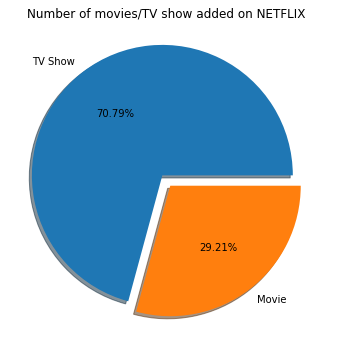

In [36]:
#
plt.pie(data_copy["type"].value_counts(),labels=data_copy["type"].unique(),
        shadow=True,
        autopct='%1.2f%%',
        explode=(0.1, 0.0))
plt.title("Number of movies/TV show added on NETFLIX  ")
plt.show()

### column 3: title : Title of the Movie / Tv Show

In [37]:
# is title is unique for every entry?
print(f' unique title: {data_copy["title"].nunique()}')

 unique title: 7271


All title are unique

### coloums 5: cast : Actors involved in the movie / show

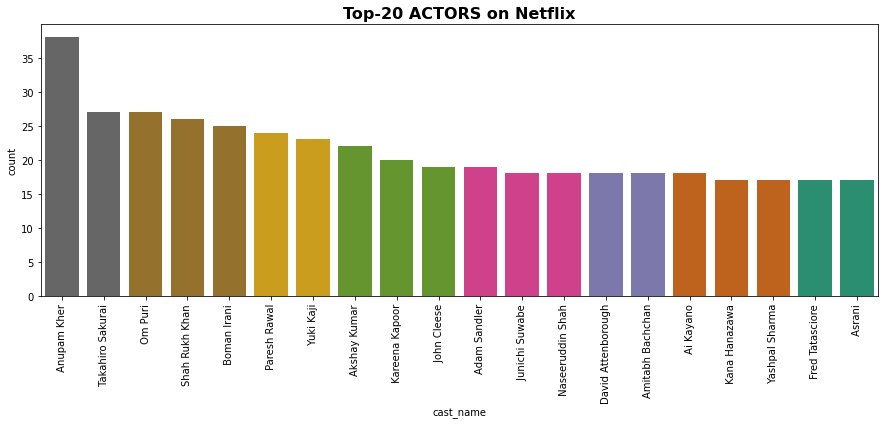

In [38]:
data_copy['cast_name'] = data_copy['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in data_copy['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2_r")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

### coloums 6: country : Country where the movie / show was produced

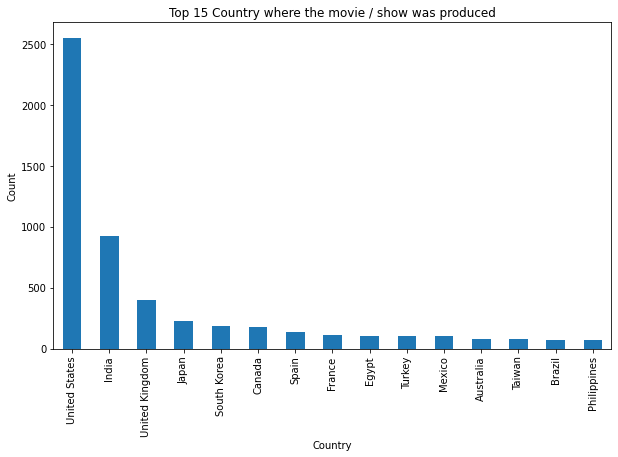

In [39]:
#top 15 country where the movie/shows was produced
data_copy["country"].value_counts()[:15].sort_values(ascending=False).plot(kind="bar")
plt.title("Top 15 Country where the movie / show was produced")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

###COlioums 7: date_added : Date it was added on Netflix

As we converted date added to year added and month added.

In [40]:
data_copy["added_year"].value_counts()

2019    1993
2020    1890
2018    1563
2017    1159
2016     424
2021     102
2015      83
2014      25
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: added_year, dtype: int64

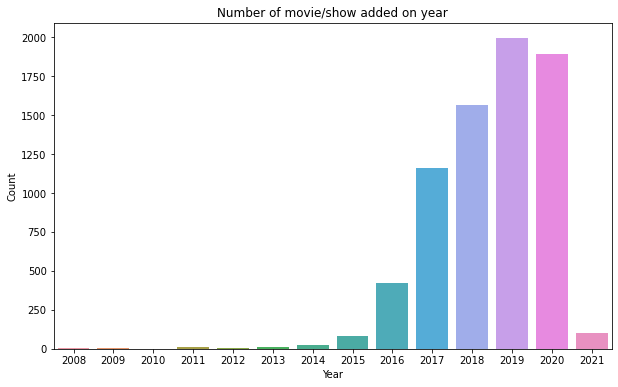

In [41]:

sns.countplot(x="added_year", data=data_copy)
plt.title("Number of movie/show added on year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


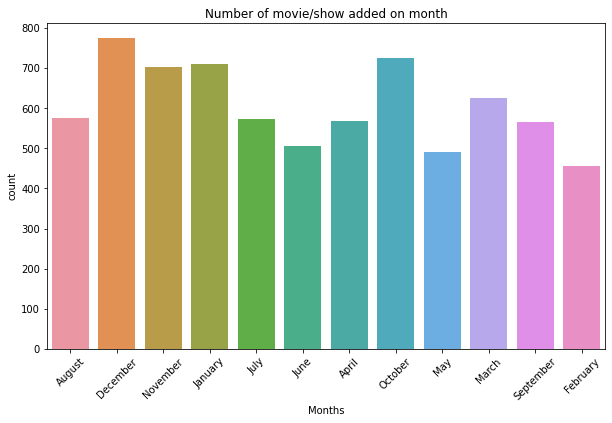

In [42]:
sns.countplot(x="added_month", data=data_copy)
plt.title("Number of movie/show added on month")
plt.xlabel("Months")
plt.xticks(rotation =45)
plt.show()

###columns 8: release_year : Actual Releaseyear of the movie / show

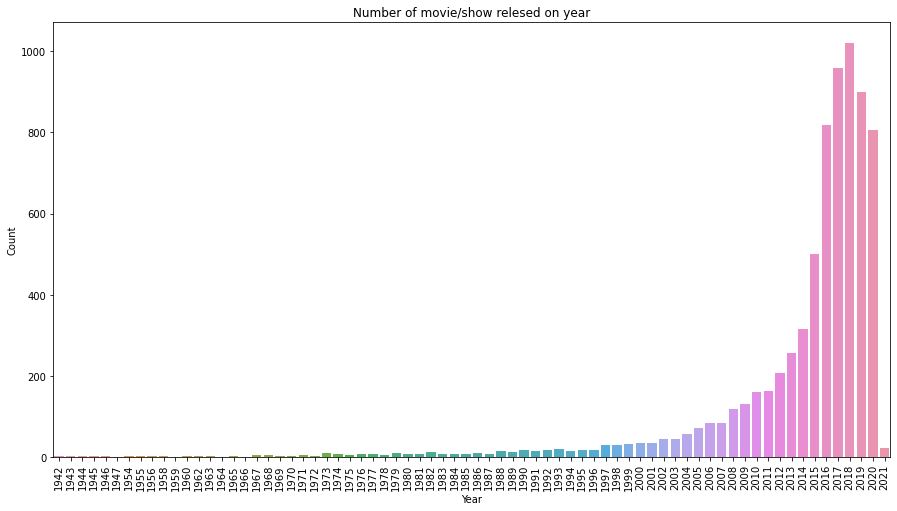

In [43]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="release_year", data=data)
plt.title("Number of movie/show relesed on year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation =90)
plt.show()

### columns 9: rating : TV Rating of the movie / show

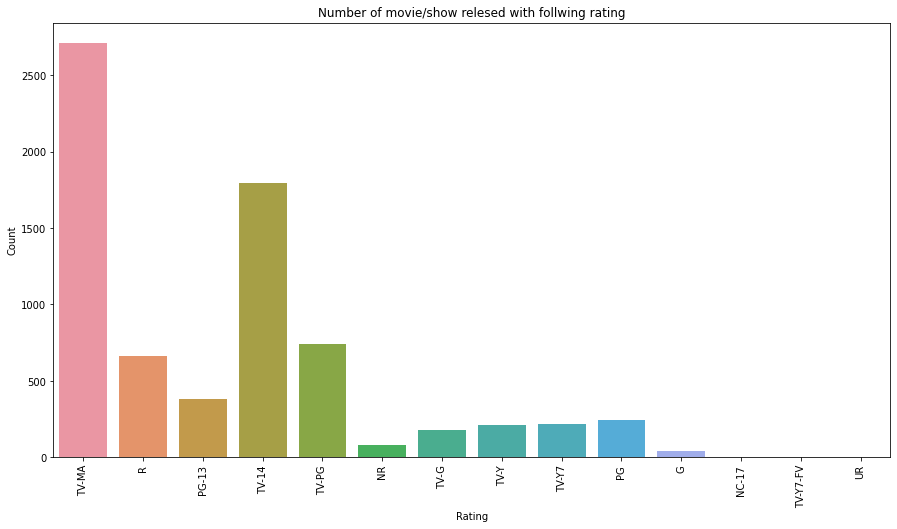

In [44]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="rating", data=data_copy)
plt.title("Number of movie/show relesed with follwing rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation =90)
plt.show()

### columns 10: duration : Total Duration - in minutes or number of seasons

In [45]:
data_copy["duration"] = pd.to_numeric(data_copy["duration"],downcast="float")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


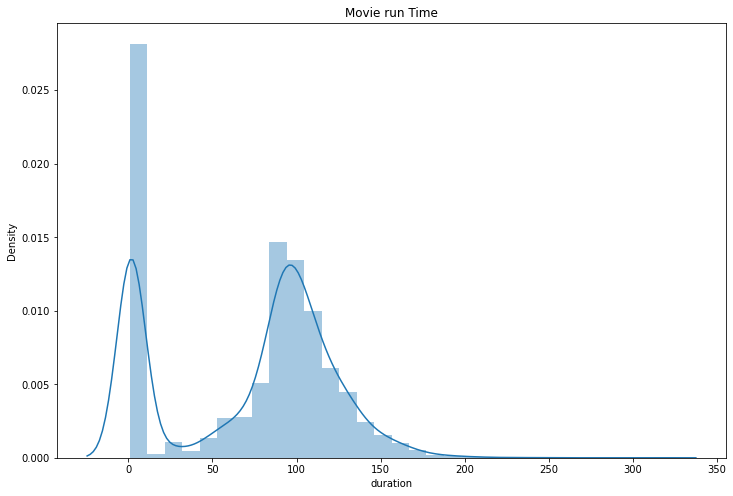

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.distplot(data_copy["duration"])
plt.title("Movie run Time")
plt.show()

### columns 11: Rating

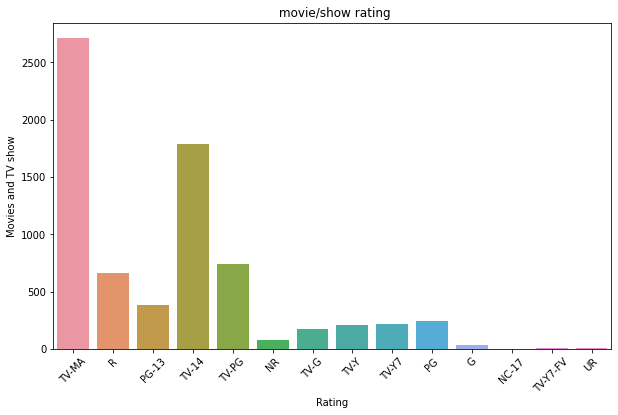

In [47]:
sns.countplot(x="rating", data=data_copy)
plt.title(" movie/show rating")
plt.xlabel("Rating")
plt.ylabel("Movies and TV show")
plt.xticks(rotation =45)
plt.show()

###columns 12: listed_in : *Genere*

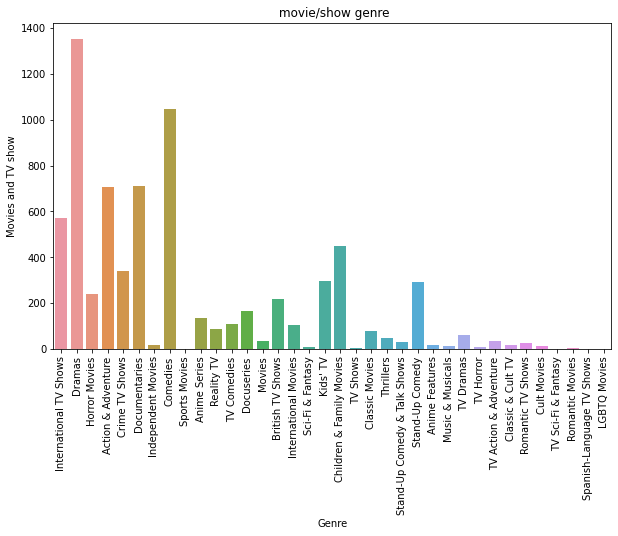

In [48]:
sns.countplot(x="genre", data=data_copy)
plt.title(" movie/show genre")
plt.xlabel("Genre")
plt.ylabel("Movies and TV show")
plt.xticks(rotation =90)
plt.show()

## What type of content (genre) produce  in top 10 producing contries

In [49]:
df_genre_country = data_copy.groupby(['genre','country']).size().unstack(fill_value=0)


In [50]:
df_genre_country.head()

country,Argentina,"Argentina, Brazil, France, Poland, Germany, Denmark","Argentina, Chile","Argentina, Chile, Peru","Argentina, France","Argentina, France, United States, Germany, Qatar","Argentina, Italy","Argentina, Spain","Argentina, United States","Argentina, United States, Mexico","Argentina, Uruguay, Serbia","Argentina, Uruguay, Spain, France",Australia,"Australia, Armenia, Japan, Jordan, Mexico, Mongolia, New Zealand, Philippines, South Africa, Sweden, United States, Uruguay","Australia, Canada","Australia, France","Australia, France, Ireland","Australia, India","Australia, Iraq","Australia, New Zealand","Australia, New Zealand, United States","Australia, United Arab Emirates","Australia, United Kingdom","Australia, United Kingdom, Canada","Australia, United Kingdom, United Arab Emirates, Canada","Australia, United Kingdom, United States, New Zealand, Italy, France","Australia, United States",Austria,"Austria, Czech Republic","Austria, Germany","Austria, Iraq, United States","Austria, United States",Bangladesh,Belarus,Belgium,"Belgium, France","Belgium, Ireland, Netherlands, Germany, Afghanistan","Belgium, Netherlands","Belgium, United Kingdom, United States",Brazil,...,"United States, South Africa","United States, South Korea","United States, South Korea, China","United States, South Korea, Japan","United States, Spain","United States, Spain, Germany","United States, Spain, Italy","United States, Sweden","United States, Sweden, Norway","United States, Taiwan","United States, Thailand","United States, United Arab Emirates","United States, United Kingdom","United States, United Kingdom, Australia","United States, United Kingdom, Canada","United States, United Kingdom, Canada, China","United States, United Kingdom, Canada, Japan","United States, United Kingdom, Denmark, Sweden","United States, United Kingdom, France","United States, United Kingdom, France, Germany, Japan","United States, United Kingdom, Germany","United States, United Kingdom, India","United States, United Kingdom, Italy","United States, United Kingdom, Japan","United States, United Kingdom, Morocco","United States, United Kingdom, Spain, South Korea","United States, Uruguay","United States, Venezuela",Uruguay,"Uruguay, Argentina","Uruguay, Argentina, Germany, Spain","Uruguay, Argentina, Spain","Uruguay, Germany","Uruguay, Guatemala","Uruguay, Spain, Mexico",Venezuela,"Venezuela, Colombia",Vietnam,West Germany,Zimbabwe
genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Action & Adventure,2,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,3,...,2,0,0,0,0,1,0,0,0,0,0,1,6,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
Anime Features,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Anime Series,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
British TV Shows,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Children & Family Movies,1,0,0,0,0,0,0,1,0,0,0,0,8,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,...,0,1,0,1,0,0,0,0,0,0,0,1,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


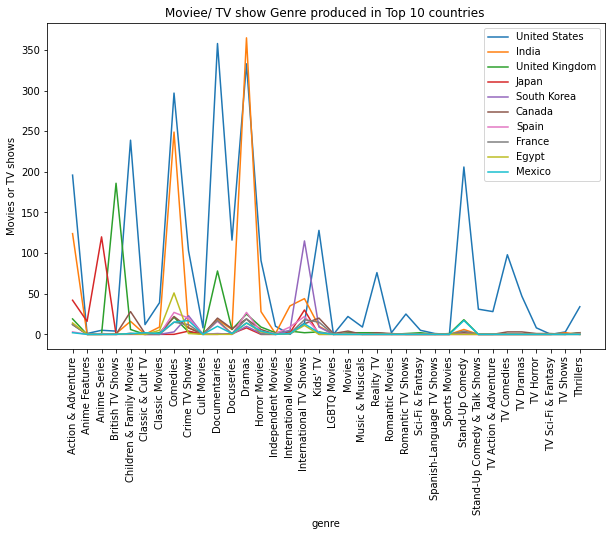

In [51]:
sns.lineplot(data=df_genre_country, x=df_genre_country.index,y=df_genre_country.loc[:,'United States'])
sns.lineplot(data=df_genre_country, x=df_genre_country.index,y=df_genre_country.loc[:,'India'])
sns.lineplot(data=df_genre_country, x=df_genre_country.index,y=df_genre_country.loc[:,'United Kingdom'])
sns.lineplot(data=df_genre_country, x=df_genre_country.index,y=df_genre_country.loc[:,'Japan'])
sns.lineplot(data=df_genre_country, x=df_genre_country.index,y=df_genre_country.loc[:,'South Korea'])
sns.lineplot(data=df_genre_country, x=df_genre_country.index,y=df_genre_country.loc[:,'Canada'])
sns.lineplot(data=df_genre_country, x=df_genre_country.index,y=df_genre_country.loc[:,'Spain'])
sns.lineplot(data=df_genre_country, x=df_genre_country.index,y=df_genre_country.loc[:,'France'])
sns.lineplot(data=df_genre_country, x=df_genre_country.index,y=df_genre_country.loc[:,'Egypt'])
sns.lineplot(data=df_genre_country, x=df_genre_country.index,y=df_genre_country.loc[:,'Mexico'])
plt.xticks(rotation=90)
plt.legend(['United States',"India","United Kingdom","Japan",'South Korea',"Canada","Spain","France","Egypt","Mexico","Turkey"])
plt.ylabel("Movies or TV shows")
plt.title("Moviee/ TV show Genre produced in Top 10 countries ")
plt.show()

## Number of tv shows and movies added per year

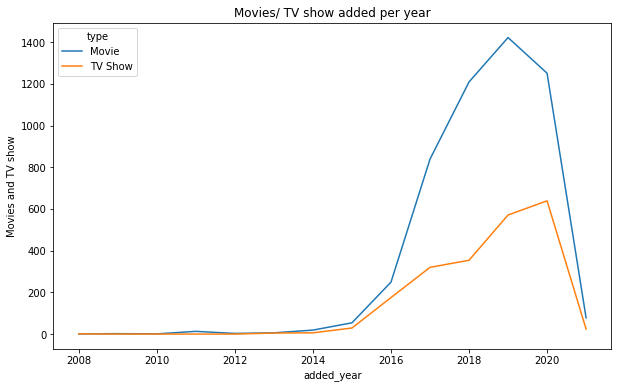

In [52]:
data_copy.groupby(['added_year','type']).size().unstack(fill_value=0).plot()
plt.title("Movies/ TV show added per year")
plt.ylabel("Movies and TV show")
plt.show()

## What type of content (type) produce in top 10 producing contries

Text(0.5, 1.0, 'NO. of movie/ TV show produce by top 10 content producing countries')

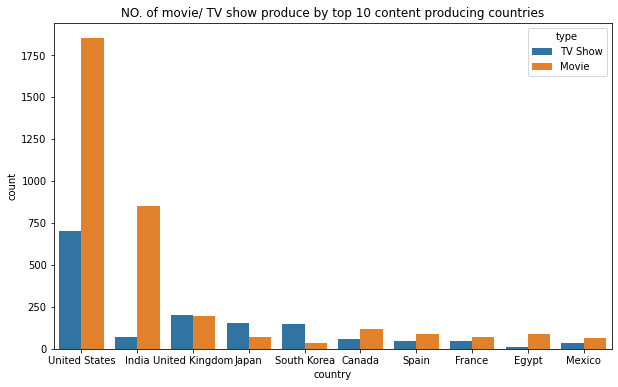

In [53]:
sns.countplot(data=data_copy,order=pd.value_counts(data_copy["country"]).iloc[:10].index, x = data_copy.country ,hue="type")
plt.title("NO. of movie/ TV show produce by top 10 content producing countries")

###top genre in TV shows

In [54]:
df_tv_shows = data_copy[data_copy["type"]=="TV Show"]

In [55]:
df_tv_shows.shape

(2124, 14)

In [56]:
df_tv_genre_country = df_tv_shows.groupby(['genre','country']).size().unstack(fill_value=0)

In [57]:
df_tv_genre_country.head()

country,Argentina,"Argentina, Spain","Argentina, United States, Mexico",Australia,"Australia, Canada","Australia, New Zealand","Australia, New Zealand, United States","Australia, United States","Austria, Germany",Belarus,Belgium,"Belgium, Netherlands",Brazil,"Brazil, United Kingdom",Canada,"Canada, Australia","Canada, Brazil","Canada, France","Canada, Germany, South Africa","Canada, Japan, Netherlands","Canada, United Kingdom","Canada, United Kingdom, United States","Canada, United States","Canada, United States, France","Canada, United States, Ireland","Canada, United States, United Kingdom, France, Luxembourg",Chile,"Chile, Italy",China,"China, Hong Kong","China, United Kingdom",Colombia,"Colombia, Mexico, United States","Colombia, United States",Croatia,Cyprus,"Czech Republic, United States",Denmark,"Denmark, Singapore, Canada, United States","Denmark, United States",...,"United Kingdom, Ireland, United States","United Kingdom, Singapore","United Kingdom, South Africa, Australia, United States","United Kingdom, Spain","United Kingdom, United States","United Kingdom, United States, Czech Republic","United Kingdom, United States, Spain, Germany, Greece, Canada","United Kingdom, West Germany",United States,"United States, Brazil, South Korea, Mexico, Japan, Germany","United States, Canada","United States, Chile","United States, Colombia","United States, Colombia, Mexico","United States, Czech Republic","United States, France","United States, France, Canada","United States, France, Japan","United States, France, South Korea, Indonesia","United States, Hungary, Ireland, Canada","United States, India","United States, Ireland","United States, Ireland, United Kingdom, India","United States, Israel, Italy, South Africa","United States, Italy","United States, Japan","United States, Japan, Canada","United States, Mexico","United States, Mexico, Colombia","United States, Mexico, Spain, Malta","United States, Netherlands, Japan, France","United States, New Zealand","United States, New Zealand, Japan","United States, Poland","United States, Russia","United States, South Korea, China","United States, Sweden","United States, United Kingdom","United States, United Kingdom, Australia","Uruguay, Germany"
genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Anime Series,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
British TV Shows,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,1,1,7,1,2,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0
Classic & Cult TV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,12,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Crime TV Shows,6,0,0,7,0,0,0,1,1,0,4,1,5,0,8,0,0,1,1,0,1,0,1,1,0,0,0,0,3,1,0,12,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,103,0,1,1,0,1,2,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
Docuseries,0,0,1,7,0,0,0,1,0,0,0,0,5,0,7,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


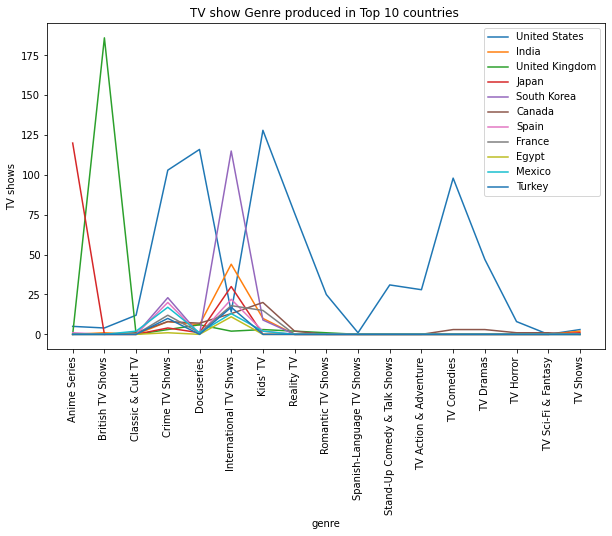

In [58]:
top_10_country = ['United States',"India","United Kingdom","Japan",'South Korea',"Canada","Spain","France","Egypt","Mexico","Turkey"]
for i in top_10_country:
  sns.lineplot(data=df_tv_genre_country, x=df_tv_genre_country.index,y=df_tv_genre_country.loc[:,i])
plt.xticks(rotation=90)
plt.legend(['United States',"India","United Kingdom","Japan",'South Korea',"Canada","Spain","France","Egypt","Mexico","Turkey"])
plt.ylabel("TV shows")
plt.title("TV show Genre produced in Top 10 countries ")
plt.show()

top genre in movies

In [59]:
df_movies = data_copy[data_copy["type"]=="Movie"]

In [60]:
df_movies

,show_id,type,title,cast,country,date_added,release_year,rating,duration,genre,description,added_year,added_month,cast_name
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93.0,Dramas,After a devastating earthquake hits Mexico Cit...,2016,December,"[Demián Bichir, Héctor Bonilla, Oscar Serran..."
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78.0,Horror Movies,"When an army recruit is found dead, his fellow...",2018,December,"[Tedd Chan, Stella Chung, Henley Hii, Lawre..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80.0,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017,November,"[Elijah Wood, John C. Reilly, Jennifer Conne..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123.0,Dramas,A brilliant group of students become card-coun...,2020,January,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ..."
6,s7,Movie,122,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95.0,Horror Movies,"After an awful accident, a couple admitted to ...",2020,June,"[Amina Khalil, Ahmed Dawood, Tarek Lotfy, A..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,s7781,Movie,Zoo,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,2018,TV-MA,94.0,Dramas,A drug dealer starts having doubts about his t...,2018,July,"[Shashank Arora, Shweta Tripathi, Rahul Kuma..."
7781,s7782,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88.0,Children & Family Movies,"Dragged from civilian life, a former superhero...",2020,January,"[Tim Allen, Courteney Cox, Chevy Chase, Kat..."
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99.0,Dramas,When Lebanon's Civil War deprives Zozo of his ...,2020,October,"[Imad Creidi, Antoinette Turk, Elias Gergi, ..."
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111.0,Dramas,A scrappy but poor boy worms his way into a ty...,2019,March,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha..."


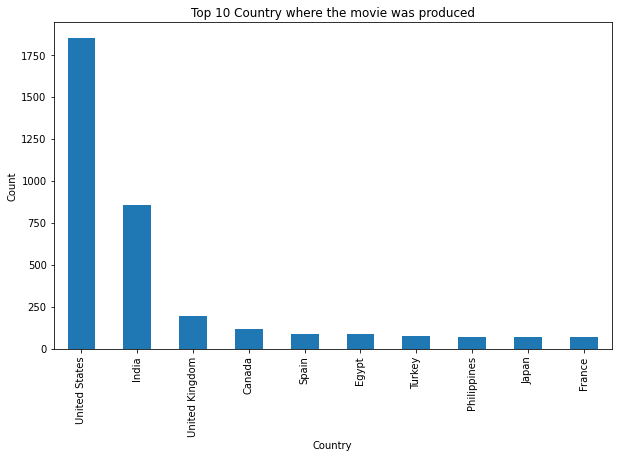

In [61]:
#top 15 country where the movie/shows was produced
df_movies["country"].value_counts()[:10].sort_values(ascending=False).plot(kind="bar")
plt.title("Top 10 Country where the movie was produced")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [62]:
df_movie_genre_country = df_movies.groupby(['genre','country']).size().unstack(fill_value=0)

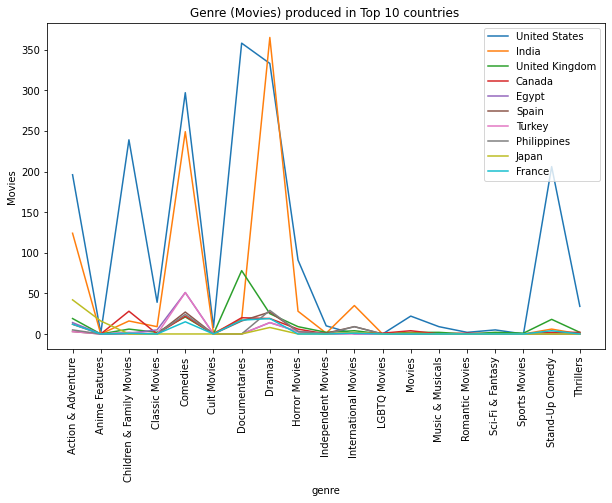

In [63]:
top_10_country_movies= ['United States',"India","United Kingdom","Canada","Egypt","Spain","Turkey","Philippines","Japan","France"]
for i in top_10_country_movies:
  sns.lineplot(data=df_movie_genre_country , x=df_movie_genre_country .index,y=df_movie_genre_country .loc[:,i])
plt.xticks(rotation=90)
plt.legend(['United States',"India","United Kingdom","Canada","Egypt","Spain","Turkey","Philippines","Japan","France"])
plt.ylabel("Movies")
plt.title("Genre (Movies) produced in Top 10 countries ")
plt.show()

## rating and country

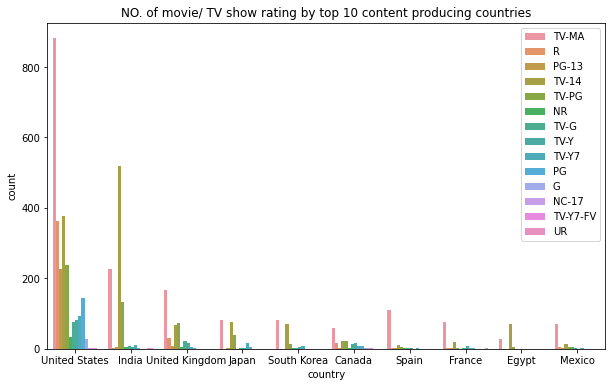

In [64]:
sns.countplot(data=data_copy,order=pd.value_counts(data_copy["country"]).iloc[:10].index, x = data_copy.country ,hue="rating", )
plt.title("NO. of movie/ TV show rating by top 10 content producing countries")
plt.legend(loc='upper right')
plt.show()

MOVIES

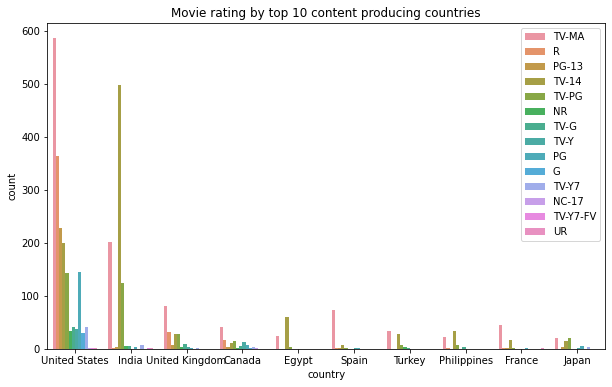

In [65]:
sns.countplot(data=df_movies,order=pd.value_counts(df_movies["country"]).iloc[:10].index, x = df_movies.country ,hue="rating", )
plt.title("Movie rating by top 10 content producing countries")
plt.legend(loc='upper right')
plt.show()

In [66]:
df_movies["rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'PG', 'G', 'TV-Y7', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

TV shows

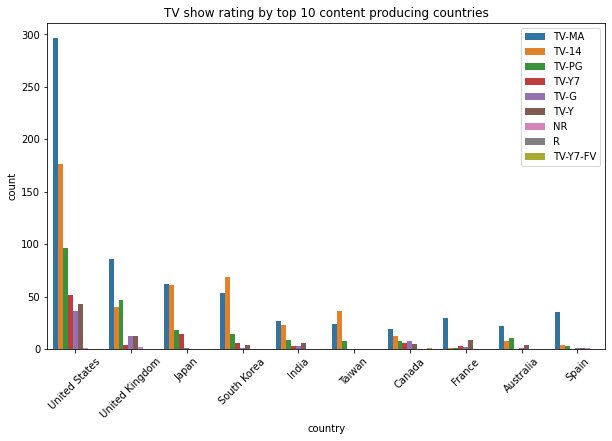

In [67]:
sns.countplot(data=df_tv_shows,order=pd.value_counts(df_tv_shows["country"]).iloc[:10].index, x = df_tv_shows.country ,hue="rating", )
plt.title("TV show rating by top 10 content producing countries")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

#corelation

In [68]:
corr = data_copy.corr()
corr.style.background_gradient(cmap='coolwarm')

,release_year,duration,added_year
release_year,1.000000,-0.237574,0.095714
duration,-0.237574,1.000000,0.039256
added_year,0.095714,0.039256,1.000000


#Data cleaning and preprocesing

In [69]:
data.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'added_year', 'added_month'],
      dtype='object')

In [70]:
netflix = data.copy()

In [71]:
netflix.shape

(7271, 13)

In [72]:
netflix_df = netflix.drop(columns=[ "show_id",'title', 'cast', 'date_added',
          'description'],axis=1)
netflix_df.head()

,type,country,release_year,rating,duration,listed_in,added_year,added_month
0,TV Show,Brazil,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,August
1,Movie,Mexico,2016,TV-MA,93,"Dramas, International Movies",2016,December
2,Movie,Singapore,2011,R,78,"Horror Movies, International Movies",2018,December
3,Movie,United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017,November
4,Movie,United States,2008,PG-13,123,Dramas,2020,January


In [73]:
netflix_df["added_month"].value_counts()

December     774
October      725
January      711
November     703
March        626
August       576
July         574
April        567
September    565
June         505
May          490
February     455
Name: added_month, dtype: int64

In [74]:
netflix_df["added_month"].unique()

array(['August', 'December', 'November', 'January', 'July', 'June',
       'April', 'October', 'May', 'March', 'September', 'February'],
      dtype=object)

convert month name to month number

In [75]:
netflix_df["added_month"].replace(['August', 'December', 'November', 'January', 'July', 'June',
       'April', 'October', 'May', 'March', 'September', 'February'],[8,12,11,1,7,6,4,10,5,3,9,2],inplace=True)

In [76]:
netflix_df["added_month"].value_counts()

12    774
10    725
1     711
11    703
3     626
8     576
7     574
4     567
9     565
6     505
5     490
2     455
Name: added_month, dtype: int64

In [77]:
netflix_df.head()

,type,country,release_year,rating,duration,listed_in,added_year,added_month
0,TV Show,Brazil,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020,8
1,Movie,Mexico,2016,TV-MA,93,"Dramas, International Movies",2016,12
2,Movie,Singapore,2011,R,78,"Horror Movies, International Movies",2018,12
3,Movie,United States,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",2017,11
4,Movie,United States,2008,PG-13,123,Dramas,2020,1


LABEL encoding

In [78]:
from sklearn.preprocessing import LabelEncoder #  converting the labels into a numeric form.
le =LabelEncoder()
netflix_df["type"] = le.fit_transform(netflix_df["type"])
netflix_df["country"] = le.fit_transform(netflix_df["country"])
netflix_df['rating'] = le.fit_transform(netflix_df['rating'])
netflix_df['listed_in'] = le.fit_transform(netflix_df['listed_in'])

In [79]:
netflix_df.head()

,type,country,release_year,rating,duration,listed_in,added_year,added_month
0,1,39,2020,8,4,391,2020,8
1,0,308,2016,8,93,304,2016,12
2,0,379,2011,5,78,330,2018,12
3,0,549,2009,4,80,47,2017,11
4,0,549,2008,4,123,288,2020,1


Text cleaning

In [80]:
#combining genre and description column 
text_df = netflix['listed_in'] + netflix['description']
text_df

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1       Dramas, International MoviesAfter a devastatin...
2       Horror Movies, International MoviesWhen an arm...
3       Action & Adventure, Independent Movies, Sci-Fi...
4       DramasA brilliant group of students become car...
                              ...                        
7781    Children & Family Movies, ComediesDragged from...
7782    Dramas, International MoviesWhen Lebanon's Civ...
7783    Dramas, International Movies, Music & Musicals...
7785    International TV Shows, Reality TVDessert wiza...
7786    Documentaries, Music & MusicalsThis documentar...
Length: 7271, dtype: object

In [81]:
import pylab as pl
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet


!pip install nltk
import nltk 
!python3 -c "import nltk; nltk.download('all')"
# for named entity recognition (NER)
from nltk import ne_chunk
#stop-words

nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [82]:
#fuction for cleaning text
def text_cleaning(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in STOPWORDS and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [83]:
new_text_df  = text_df.apply(text_cleaning)
new_text_df

0       International Shows Dramas Sci-Fi FantasyIn fu...
1       Dramas International MoviesAfter devastating e...
2       Horror Movies International MoviesWhen army re...
3       Action Adventure Independent Movies Sci-Fi Fan...
4       DramasA brilliant group student become card-co...
                              ...                        
7781    Children Family Movies ComediesDragged civilia...
7782    Dramas International MoviesWhen Lebanon Civil ...
7783    Dramas International Movies Music MusicalsA sc...
7785    International Shows Reality TVDessert wizard A...
7786    Documentaries Music MusicalsThis documentary d...
Length: 7271, dtype: object

Extracting the feature and creating document-term-matrix

In [84]:
# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [85]:
vector = TfidfVectorizer(stop_words=STOPWORDS,max_features=1000)
vect_text=vector.fit_transform(new_text_df)
print(vector.get_feature_names())

['000', '10', '1970s', '1980s', 'ability', 'academy', 'accident', 'accidentally', 'account', 'accused', 'across', 'action', 'activist', 'actor', 'actress', 'adult', 'adventure', 'adventurea', 'affair', 'africa', 'african', 'aged', 'agency', 'agent', 'aging', 'agrees', 'alien', 'along', 'also', 'ambition', 'ambitious', 'america', 'american', 'amid', 'among', 'ancient', 'angeles', 'animal', 'animated', 'anime', 'another', 'answer', 'anthology', 'anything', 'apart', 'apartment', 'army', 'around', 'arranged', 'arrives', 'art', 'artist', 'aspiring', 'assassin', 'athlete', 'attack', 'attempt', 'avenge', 'away', 'baby', 'bachelor', 'back', 'band', 'bank', 'based', 'battle', 'beautiful', 'beauty', 'become', 'becomes', 'becoming', 'befriends', 'begin', 'behind', 'belief', 'beloved', 'best', 'better', 'beyond', 'biggest', 'bill', 'biopic', 'birth', 'birthday', 'black', 'body', 'bollywood', 'bond', 'book', 'bos', 'boy', 'boyfriend', 'brave', 'break', 'bride', 'bring', 'brings', 'british', 'brothe

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [86]:
idf=vector.idf_
idf_df=dict(zip(vector.get_feature_names(), idf))
l=sorted(idf_df, key=(idf_df).get)
# print(l)
print(l[0],l[-1])
print(idf_df['international']) 
print(idf_df['academy']) 

international german
1.7590801461640502
6.756292419928165


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Topic modeling

## LSA

In [87]:
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)
print(lsa_top[0])
print(lsa_top.shape)

[ 0.20187984  0.07229853  0.11166983 -0.08163577 -0.04728375 -0.02380723
 -0.07376313  0.07096742  0.10100767  0.07568241]
(7271, 10)


In [88]:
l=lsa_top[0]
print("NETFLIX TOPIC 0 :")
for i,topic in enumerate(l):
  print("NETFLIX Topic ",i," : ",topic*100)

NETFLIX TOPIC 0 :
NETFLIX Topic  0  :  20.187983550926923
NETFLIX Topic  1  :  7.2298527758326125
NETFLIX Topic  2  :  11.166982717308576
NETFLIX Topic  3  :  -8.163577154877567
NETFLIX Topic  4  :  -4.728375106519336
NETFLIX Topic  5  :  -2.3807229772473506
NETFLIX Topic  6  :  -7.376313360941943
NETFLIX Topic  7  :  7.096742166558009
NETFLIX Topic  8  :  10.100767112715568
NETFLIX Topic  9  :  7.568240770564831


In [89]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 0.00636903  0.00582838  0.00804106 ...  0.13290041  0.00850782
   0.00594199]
 [ 0.00505375 -0.00366959  0.00083662 ... -0.05893796 -0.00542635
   0.001897  ]
 [ 0.00326314 -0.0004407   0.00098465 ... -0.03413309 -0.00109969
   0.00023711]
 ...
 [-0.00276456 -0.00547767  0.00189784 ...  0.01242282  0.00277477
  -0.00344467]
 [ 0.00832996 -0.0020779  -0.00913351 ... -0.01757378 -0.00212288
  -0.00344195]
 [ 0.00741513 -0.00240636  0.00151397 ...  0.22618515 -0.00161714
  -0.00442733]]


In [90]:
# top 10 topics on Netflix
vocab = vector.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print(" NETFLIX Genre "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

 NETFLIX Genre 0: 
international shows movies dramas comedies romantic family life independent young 

 NETFLIX Genre 1: 
shows crime british spanish language korean docuseries series reality showsa 

 NETFLIX Genre 2: 
action adventure fi sci kids children world family anime series 

 NETFLIX Genre 3: 
stand comedy special family comedian children comic talk take music 

 NETFLIX Genre 4: 
family children movies shows save comedieswhen christmas friend horror home 

 NETFLIX Genre 5: 
documentaries documentary music world moviesthis docuseries series sports life follows 

 NETFLIX Genre 6: 
comedies romantic friend love life kids music school adventure documentaries 

 NETFLIX Genre 7: 
music movies documentaries romantic fi sci love action woman documentary 

 NETFLIX Genre 8: 
horror movies fi sci romantic series kids reality docuseries nature 

 NETFLIX Genre 9: 
life docuseries young woman nature science love reality family romantic 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


As we can see topic modeling did the gener analysis.

## LDA

In [91]:

from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics
lda_top=lda_model.fit_transform(vect_text)
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top[0])

(7271, 10)
[0.02414329 0.0241389  0.419037   0.02414081 0.13030539 0.28165963
 0.02413948 0.02414636 0.02414144 0.02414771]


In [92]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)
# composition of doc 0 for eg
print("Doc 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

0.9999999999999998
Doc 0: 
Topic  0 :  2.4143291102150237 %
Topic  1 :  2.413890035161607 %
Topic  2 :  41.9036995817829 %
Topic  3 :  2.4140805053531817 %
Topic  4 :  13.030539146710233 %
Topic  5 :  28.16596280645841 %
Topic  6 :  2.4139476865779605 %
Topic  7 :  2.4146358567654547 %
Topic  8 :  2.414143942506045 %
Topic  9 :  2.4147713284691585 %


In [93]:
print(lda_model.components_[0])
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[ 0.14845193  0.1043781   0.10464714  0.10448645  0.10543017  0.10773273
  2.71984507  0.34839771  0.10458062  0.11672179  6.14440132  0.12530215
  0.35226655  0.10596658  3.14447605  0.10449174  0.41126489  0.10449566
 14.14417681  0.1064364   0.73845012  0.10405056  0.10410755  0.10673739
  7.39745119  0.10467766  0.10443069  2.39984395  0.10435076  8.26716429
  0.64145241  0.10516071  0.36332212  0.10970845  0.11473908  0.1058713
  0.10479893  0.10804779  0.10677181  2.40049147  0.10680381  0.10699519
  0.10465949  0.14033077  1.81680852  6.51534173  0.10497157  0.10600297
  0.15920262  0.10458254  0.11844485  0.10618334  6.38313842  0.10484377
  5.3718589   0.10521981  0.57518861  0.10465141  4.25651215  0.10947727
  0.13321791  0.10881694  9.40558551  0.1136812   0.10467882  2.8392977
  0.10406719  8.73389051  0.10560556  0.11375752 19.55228834  9.41088261
 13.49085161  5.90240668  0.15687952  0.10570944  0.19411294  0.10607532
  0.16023422  0.10462969  0.15124162  8.97596328  0.1

important feature of each topic

In [94]:
vocab = vector.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
international dramas movies comedies romantic 

Topic 1: 
stand documentaries comedy documentary sports 

Topic 2: 
action adventure international dramas movies 

Topic 3: 
international dramas police movies action 

Topic 4: 
dramas movies romantic comedies independent 

Topic 5: 
fi sci cult action adventure 

Topic 6: 
family children kids comedieswhen movies 

Topic 7: 
family travel doctor back international 

Topic 8: 
reality docuseries shows series british 

Topic 9: 
shows crime international spanish language 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#Clustering similar content by matching text-based features

# K Means

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [96]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7271 entries, 0 to 7786
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   type          7271 non-null   int64
 1   country       7271 non-null   int64
 2   release_year  7271 non-null   int64
 3   rating        7271 non-null   int64
 4   duration      7271 non-null   int64
 5   listed_in     7271 non-null   int64
 6   added_year    7271 non-null   int64
 7   added_month   7271 non-null   int64
dtypes: int64(8)
memory usage: 831.2 KB


In [97]:
###netflix_df.drop('season_count',axis=1,inplace=True)

In [112]:
scaler = MinMaxScaler()  #Transform features by scaling each feature to a given range
sc = scaler.fit_transform(netflix_df)
netflix_data = pd.DataFrame(sc, columns=list(netflix_df.columns))
X = netflix_data
kmeans = [KMeans(n_clusters=i) for i in range(1,20)]
score = [kmeans[i].fit(netflix_data).score(netflix_data) for i in range(len(kmeans))]

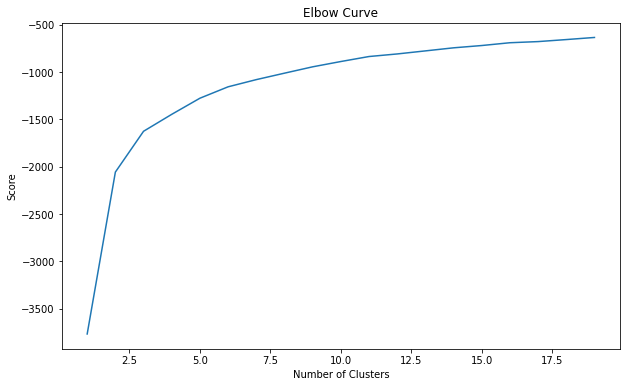

In [114]:
pl.plot(range(1,20),score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [100]:
#fitting
kmeans = KMeans(n_clusters=5)
kmeans.fit(netflix_data)

KMeans(n_clusters=5)

In [101]:
len(kmeans.labels_)
netflix['cluster'] = kmeans.labels_


In [102]:
netflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,1
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,4
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,0
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,0
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,January,2


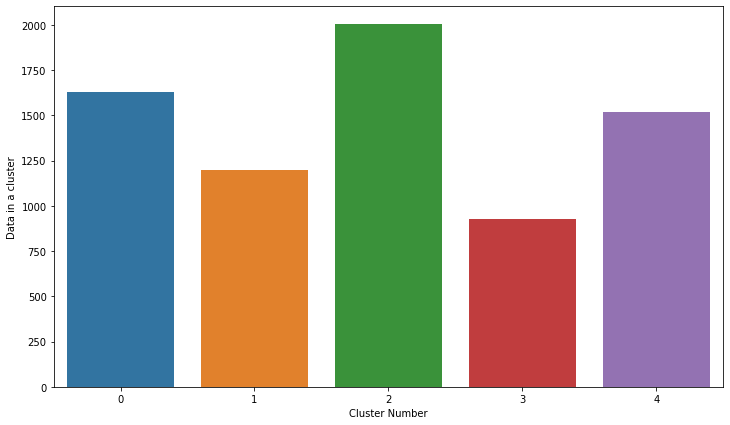

In [103]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=netflix.groupby(['cluster']).count()['type'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Data in a cluster")


We clearly see that one cluster is the largest and one cluster has the fewest number of movies or tv show.

In [104]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(netflix_data)

print(len(kmeans.labels_))
data['cluster'] = kmeans.labels_
data.head()

7271


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,cluster
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,3
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,1
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,2
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,2
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,January,4


In [105]:
netflix.groupby(['cluster']).mean()

,release_year,duration,added_year
cluster,,,
0,2012.746773,92.441303,2018.294407
1,2016.196995,1.816361,2018.409015
2,2013.108891,99.777223,2018.644855
3,2016.198704,1.841253,2018.664147
4,2012.432806,108.940053,2018.420290


In [106]:
size_array = list(netflix.groupby(['cluster']).count()['duration'].values)
size_array

[1627, 1198, 2002, 926, 1518]

Cluster Identification

In [107]:
netflix[netflix['cluster']==size_array.index(sorted(size_array)[0])].sample(5)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,cluster
6096,s6097,TV Show,The Assassination of Gianni Versace,"Edgar Ramírez, Darren Criss, Ricky Martin, Pen...",United States,2019-03-06,2018,TV-MA,1,"Crime TV Shows, TV Dramas, TV Thrillers","Defining moments in Andrew Cunanan's life, sta...",2019,March,3
7048,s7049,TV Show,This Evening,"Eyad Nassar, Ahmed Dawood, Mohamed Farraag, Ha...",Egypt,2019-03-11,2017,TV-14,1,"International TV Shows, TV Dramas",The lives of a wealthy couple hiding their mar...,2019,March,3
1711,s1712,TV Show,Designated Survivor,"Kiefer Sutherland, Natascha McElhone, Maggie Q...",United States,2019-06-07,2019,TV-MA,3,"Crime TV Shows, TV Dramas, TV Thrillers",America's fate rests in the hands of a low-lev...,2019,June,3
4589,s4590,TV Show,Oh No! It's an Alien Invasion,"Al Mukadam, Dan Chameroy, Seán Cullen, Stacey ...",Canada,2015-05-31,2014,TV-Y7-FV,2,"Kids' TV, TV Action & Adventure, TV Sci-Fi & F...",Nate and his Super Wicked Extreme Emergency Te...,2015,May,3
6390,s6391,TV Show,The Ghost Bride,"Huang Peijia, Wu Kang-jen, Ludi Lin, Janet Hsi...","Taiwan, Malaysia",2020-01-23,2020,TV-14,1,"International TV Shows, TV Dramas, TV Mysteries","In 1890s Malacca, Li Lan finds herself in the ...",2020,January,3


In [108]:
netflix[netflix['cluster']==size_array.index(sorted(size_array)[-1])].sample(5)

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,cluster
3146,s3147,Movie,Jen Kirkman: Just Keep Livin’?,Jen Kirkman,United States,2017-01-03,2017,TV-MA,69,Stand-Up Comedy,Incisive comic Jen Kirkman gets real about wom...,2017,January,2
894,s895,Movie,Bibi & Tina,"Lina Larissa Strahl, Lisa-Marie Koroll, Louis ...",Germany,2017-04-15,2014,TV-PG,97,"Children & Family Movies, Music & Musicals",Teen witch Bibi and horse-loving Tina face tro...,2017,April,2
2500,s2501,Movie,Gori Tere Pyaar Mein,"Imran Khan, Kareena Kapoor, Nizhalgal Ravi, An...",India,2020-04-01,2013,TV-14,144,"Comedies, Dramas, International Movies","Sriram is concerned only with spending money, ...",2020,April,2
912,s913,Movie,Biggie & Tupac,Nick Broomfield,United Kingdom,2019-01-26,2002,R,108,"Documentaries, Music & Musicals",British documentarian Nick Broomfield investig...,2019,January,2
6729,s6730,Movie,The Other Guys,"Will Ferrell, Mark Wahlberg, Eva Mendes, Micha...",United States,2020-02-01,2010,PG-13,108,"Action & Adventure, Comedies",New York cops Allen and Terry toil in obscurit...,2020,February,2


Movies and Tv show grouped in different cluster

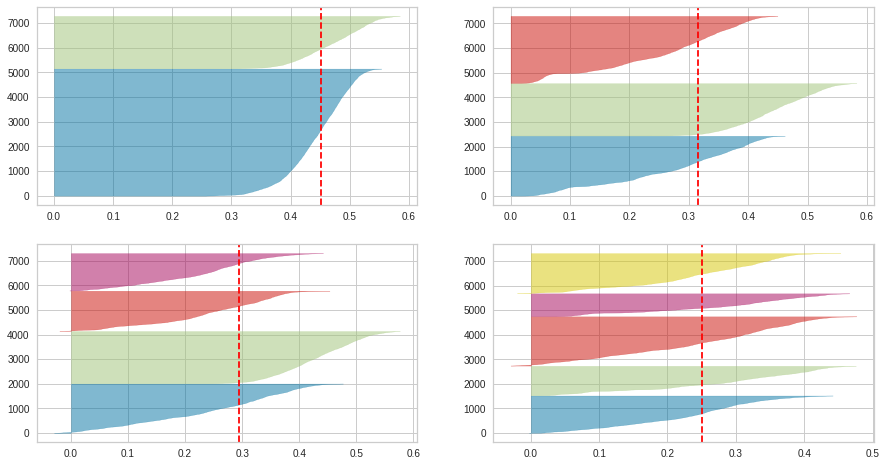

In [115]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

The value of 4 and 5 for n_cluster looks to be the optimal one. The silhouette score for each clusteer is above average silhouette scores.